In [ ]:
import plotly.io as pio
pio.renderers.default = "vscode+jupyterlab+notebook_connected"

# **Project 2:Relationship between GDP and Population in the State of California**

## Project Overview
This project explores the relationship between **Gross Domestic Product (GDP)** and **Population** in the State of California. The objective is to analyze how population trends correlate with economic growth over time and evaluate GDP per capita as a measure of productivity. Specifically, we focus on the data from the past **6 years (2018-2023)** to observe recent trends and draw conclusions about the potential effects of population changes on the state's economic performance.


### *Hypothesis
The population of the State of California has been decreasing recently, potentially due to rising social issues such as homelessness and abandonment. These trends might signify increasing poverty, which could negatively impact the state’s GDP. Therefore, we hypothesize that California's GDP has been decreasing in correlation with its population decline in recent years.

### Citation
[FRED | Gross Domestic Product: All Industry Total in California (CANQGSP)](https://fred.stlouisfed.org/series/CANQGSP)
[FRED | Resident Population in California (CAPOP)](https://fred.stlouisfed.org/series/CAPOP#0)


## **1. Data: Gross Domestic Product: All Industry Total in California**

### **1-1. View a Data**
Load the GDP data from a CSV file and show the DataFrame structure and the rows

In [ ]:
import pandas as pd

gdp_df = pd.read_csv('CANQGSP.csv', encoding='utf-8')

gdp_df.info()

gdp_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     21 non-null     object 
 1   CANQGSP  21 non-null     float64
dtypes: float64(1), object(1)
memory usage: 468.0+ bytes


,DATE,CANQGSP
0,2018-01-01,2838125.2
1,2018-04-01,2885427.0
2,2018-07-01,2925403.0
3,2018-10-01,2949168.2
4,2019-01-01,2987644.2
5,2019-04-01,3047883.1
6,2019-07-01,3096476.8
7,2019-10-01,3142514.6
8,2020-01-01,3118522.7
9,2020-04-01,2871237.9


### **1-2. Data Cleaning**
Rename the column 'DATE' to 'Date' and 'CANQGSP' to 'GDP in CA'. and display the rows of the DataFrame to check the data

In [ ]:
import pandas as pd

gdp_df = pd.read_csv('CANQGSP.csv', encoding='utf-8')

gdp_df.rename(columns={'DATE': 'Date', 'CANQGSP': 'GDP in CA'}, inplace=True)

gdp_df

,Date,GDP in CA
0,2018-01-01,2838125.2
1,2018-04-01,2885427.0
2,2018-07-01,2925403.0
3,2018-10-01,2949168.2
4,2019-01-01,2987644.2
5,2019-04-01,3047883.1
6,2019-07-01,3096476.8
7,2019-10-01,3142514.6
8,2020-01-01,3118522.7
9,2020-04-01,2871237.9


## **2. Data: Resident Population in California**

### **2-1. View a Data**
Load the population data for California from the CSV file and show the DataFrame structure and the rows

In [ ]:
import pandas as pd

population_df = pd.read_csv('CAPOP.csv', encoding='utf-8')

population_df.info()

population_df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    124 non-null    object 
 1   CAPOP   124 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.1+ KB


,DATE,CAPOP
0,1900-01-01,1490.000
1,1901-01-01,1550.000
2,1902-01-01,1623.000
3,1903-01-01,1702.000
4,1904-01-01,1792.000
...,...,...
119,2019-01-01,39437.610
120,2020-01-01,39503.200
121,2021-01-01,39145.060
122,2022-01-01,39040.616


### **2-2. Data Cleaning**
Rename the column 'DATE' to 'Date' and 'CAPOP' to 'Population in CA'. and display the rows of the population data to check the data

In [ ]:
import pandas as pd

population_df = pd.read_csv('CAPOP.csv', encoding='utf-8')

population_df.rename(columns={'DATE': 'Date', 'CAPOP': 'Population in CA'}, inplace=True)

population_df

,Date,Population in CA
0,1900-01-01,1490.000
1,1901-01-01,1550.000
2,1902-01-01,1623.000
3,1903-01-01,1702.000
4,1904-01-01,1792.000
...,...,...
119,2019-01-01,39437.610
120,2020-01-01,39503.200
121,2021-01-01,39145.060
122,2022-01-01,39040.616


## **3. Merge the Data Sets and Cleaning**

### **3-1. Merge**
Merge the two datasets on 'Date' (allowing for non-matching dates) and show the rows of the merged DataFrame

In [ ]:
merged_df = pd.merge(gdp_df, population_df, on='Date', how='outer')

merged_df.head(500)

,Date,GDP in CA,Population in CA
0,1900-01-01,NaN,1490.000
1,1901-01-01,NaN,1550.000
2,1902-01-01,NaN,1623.000
3,1903-01-01,NaN,1702.000
4,1904-01-01,NaN,1792.000
...,...,...,...
134,2022-01-01,3591071.1,39040.616
135,2022-04-01,3641685.3,NaN
136,2022-07-01,3688897.5,NaN
137,2022-10-01,3720008.9,NaN


### **3-2. Cleaning**
Remove rows with NaN values and display the cleaned DataFrame

In [ ]:
cleaned_df = merged_df.dropna()

cleaned_df

,Date,GDP in CA,Population in CA
118,2018-01-01,2838125.2,39437.463
122,2019-01-01,2987644.2,39437.610
126,2020-01-01,3118522.7,39503.200
130,2021-01-01,3279904.9,39145.060
134,2022-01-01,3591071.1,39040.616
138,2023-01-01,3808244.2,38965.193


## **4. Data visualization**

This graph displays the economic and demographic trends in California over time, focusing on GDP and population growth. The graph provides valuable insights into how these two variables have evolved over the years, with special emphasis on the impact of the COVID-19 pandemic period (2020-2022).
- X-Axis (Year): Represents the time span from the early 1900s to the present, showing the yearly data points for both GDP and population.
- Primary Y-Axis (Left): Shows the GDP in California measured in trillions of dollars. This is represented as a line chart in blue, which allows us to track the growth of the state's economy over time.
- Secondary Y-Axis (Right): Represents the population of California, shown in millions of persons. The data is visualized as a bar chart in orange, indicating the changes in population size across different years.
- Shaded Area (2020-2022): The region from 2020 to 2022 is shaded in gray to highlight the period of the COVID-19 pandemic. This shading allows us to visually assess the economic and population shifts during this unique time.

C:\Users\skysh\AppData\Local\Temp\ipykernel_18520\2554876885.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\skysh\AppData\Local\Temp\ipykernel_18520\2554876885.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\skysh\AppData\Local\Temp\ipykernel_18520\2554876885.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

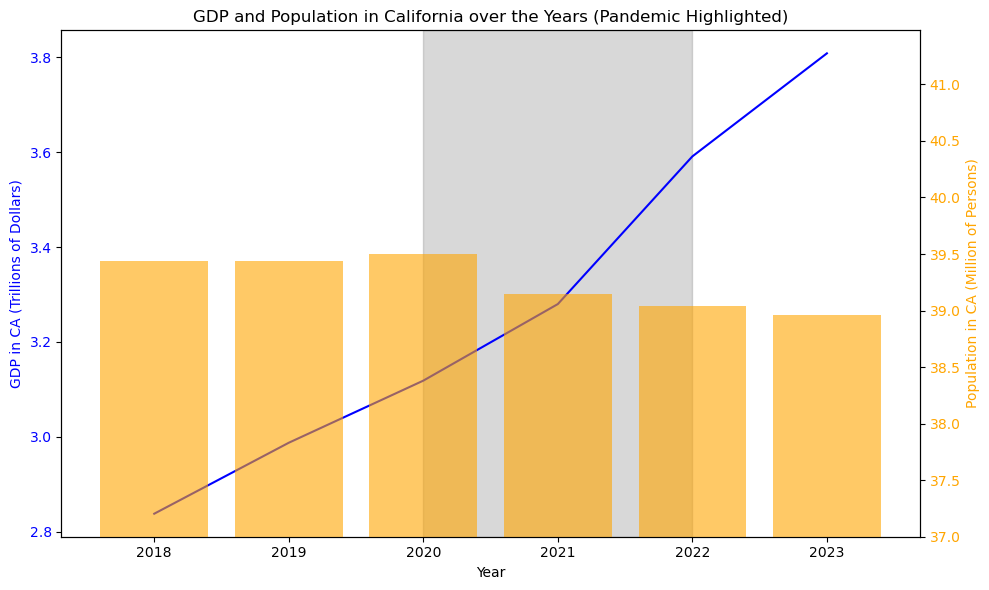

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

cleaned_df['Date'] = pd.to_datetime(cleaned_df['Date'])

cleaned_df['Year'] = cleaned_df['Date'].dt.year

cleaned_df['GDP in CA (Trillions)'] = cleaned_df['GDP in CA'] / 1_000_000

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(cleaned_df['Year'], cleaned_df['GDP in CA (Trillions)'], color='blue', label='GDP in CA (Trillions of Dollars)')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP in CA (Trillions of Dollars)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax1.axvspan(2020, 2022, color='gray', alpha=0.3)

ax2 = ax1.twinx()
ax2.bar(cleaned_df['Year'], cleaned_df['Population in CA'] / 1000, color='orange', alpha=0.6, label='Population in CA (Million of Persons)')
ax2.set_ylabel('Population in CA (Million of Persons)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

ax2.set_ylim(bottom=37)

plt.title('GDP and Population in California over the Years (Pandemic Highlighted)')
fig.tight_layout()
plt.show()



## **5. Conclusion**

Initially, based on the hypothesis, I expected a strong positive correlation between GDP and population in California, with both variables increasing together over time. As the population grows, it would naturally lead to higher demand, more production, and thus an increase in GDP.

However, the graph reveals an interesting insight, particularly during the COVID-19 pandemic period (2020-2022). Despite a noticeable decrease in population during this time, GDP in California continued to increase. This challenges the initial assumption of a direct correlation between population growth and GDP growth.

While the population in California showed signs of decline due to factors like migration and economic uncertainty during the pandemic, the state's GDP still demonstrated resilience. This could be attributed to various factors such as technological growth, remote work expansion, and other economic dynamics that allowed California's economy to thrive despite demographic challenges.

This highlights the complexity of the relationship between population and GDP. While population size is a key factor in economic growth, it is not the sole determinant, as external factors such as innovation, policy changes, and market conditions can also play significant roles in driving economic performance.